# Data Exploration

The dataset we will be using in this activity is from the ProPublica analysis of the COMPAS system.

Data & original analysis gathered by ProPublica.
Original Data methodology article:
https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm

Original Article:
https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

Original data from ProPublica:
https://github.com/propublica/compas-analysis

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# read the datafile
crime_df = pd.read_csv('pb_compass.csv')
crime_df

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,6/2/85,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18311,NaN,alexsandra beauchamps,alexsandra,beauchamps,Female,21/12/1984,31,25 - 45,African-American,0,...,NaN,Risk of Recidivism,6,Medium,29/12/2014,Risk of Violence,4,Low,5,0
18312,NaN,winston gregory,winston,gregory,Male,1/10/58,57,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/01/2014,Risk of Violence,1,Low,0,0
18313,NaN,farrah jean,farrah,jean,Female,17/11/1982,33,25 - 45,African-American,0,...,NaN,Risk of Recidivism,2,Low,9/3/14,Risk of Violence,2,Low,3,0
18314,NaN,florencia sanmartin,florencia,sanmartin,Female,18/12/1992,23,Less than 25,Hispanic,0,...,NaN,Risk of Recidivism,4,Low,30/06/2014,Risk of Violence,4,Low,2,0


In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   sex                      18316 non-null  object 
 5   dob                      18316 non-null  object 
 6   age                      18316 non-null  int64  
 7   age_cat                  18316 non-null  object 
 8   race                     18316 non-null  object 
 9   juv_fel_count            18316 non-null  int64  
 10  decile_score             18316 non-null  int64  
 11  juv_misd_count           18316 non-null  int64  
 12  juv_other_count          18316 non-null  int64  
 13  priors_count             18316 non-null  int64  
 14  days_b_screening_arres

## Data cleanup

From this information we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as violent_recid and r_jail_in). Plus there is so much features to analyze that it may be better to concentrate on the ones which can give us real insights. Let's just remove Id and the features with 30% or more missing values.

In [4]:
crime_df2 = crime_df[[column for column in crime_df if crime_df[column].count() / len(crime_df) >= 0.3]]
# drop the id column
del crime_df2['id'] # another way to delete a column -> crime_df = crime_df.drop('id', 1)

# find which columns got dropped by comparing the dataframe to the original
print("List of dropped columns:", end=" ")

for c in crime_df.columns:
    if c not in crime_df2.columns:
        print(c, end=", ")
print('\n')

# use the cleaned up dataframe moving forward
crime_df = crime_df2

List of dropped columns: id, violent_recid, vr_charge_degree, vr_offense_date, vr_charge_desc, 



In [5]:
# preview the data
crime_df.describe()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,event
count,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,17019.000000,17449.000000,18316.000000,6359.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,34.019273,0.076873,4.997052,0.098439,0.124263,3.913191,4.302485,57.694596,0.414774,19.961629,0.073105,4.997052,4.022822,3.913191,0.044715
std,11.667811,0.464272,2.937569,0.517639,0.524537,5.299864,81.159881,317.994694,0.576449,74.139695,0.260317,2.937569,2.614189,5.299864,0.206683
min,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,0.000000
75%,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,0.000000,8.000000,6.000000,5.000000,0.000000
max,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,993.000000,1.000000,10.000000,10.000000,43.000000,1.000000


From the data preview we can also see that the first two entries are exactly the same. This might indicate that there are more duplicates. If you explore the data further you will notice that there are many duplicates so let's remove those

In [6]:
# drop duplicate rows and keeping the first occurance
crime_df.drop_duplicates(keep = 'first')

,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,...,0,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,michael ryan,michael,ryan,Male,6/2/85,31,25 - 45,Caucasian,0,5,...,0,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,3,...,1,Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,4,...,0,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,8,...,0,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,malcolm simmons,malcolm,simmons,Male,25/03/1993,23,Less than 25,African-American,0,3,...,0,Risk of Recidivism,3,Low,1/2/14,Risk of Violence,5,Medium,0,0
18311,alexsandra beauchamps,alexsandra,beauchamps,Female,21/12/1984,31,25 - 45,African-American,0,6,...,0,Risk of Recidivism,6,Medium,29/12/2014,Risk of Violence,4,Low,5,0
18312,winston gregory,winston,gregory,Male,1/10/58,57,Greater than 45,Other,0,1,...,0,Risk of Recidivism,1,Low,14/01/2014,Risk of Violence,1,Low,0,0
18313,farrah jean,farrah,jean,Female,17/11/1982,33,25 - 45,African-American,0,2,...,0,Risk of Recidivism,2,Low,9/3/14,Risk of Violence,2,Low,3,0


### To Do: Explore the dataset more and remove any columns that are duplicated.

Refer to Panda's DataFrame documentation for a list of functions that will help with this task.

https://pandas.pydata.org/docs/reference/frame.html

Hint: Look at duplicated and transpose.

In [9]:
crime_df.duplicated().sum()

7016

In [10]:
crime_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18306,18307,18308,18309,18310,18311,18312,18313,18314,18315
name,miguel hernandez,miguel hernandez,michael ryan,kevon dixon,ed philo,ed philo,ed philo,ed philo,ed philo,marcu brown,...,raheem smith,raheem smith,raheem smith,steven butler,malcolm simmons,alexsandra beauchamps,winston gregory,farrah jean,florencia sanmartin,florencia sanmartin
first,miguel,miguel,michael,kevon,ed,ed,ed,ed,ed,marcu,...,raheem,raheem,raheem,steven,malcolm,alexsandra,winston,farrah,florencia,florencia
last,hernandez,hernandez,ryan,dixon,philo,philo,philo,philo,philo,brown,...,smith,smith,smith,butler,simmons,beauchamps,gregory,jean,sanmartin,sanmartin
sex,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Female,Male,Female,Female,Female
dob,18/04/1947,18/04/1947,6/2/85,22/01/1982,14/05/1991,14/05/1991,14/05/1991,14/05/1991,14/05/1991,21/01/1993,...,28/06/1995,28/06/1995,28/06/1995,17/07/1992,25/03/1993,21/12/1984,1/10/58,17/11/1982,18/12/1992,18/12/1992
age,69,69,31,34,24,24,24,24,24,23,...,20,20,20,23,23,31,57,33,23,23
age_cat,Greater than 45,Greater than 45,25 - 45,25 - 45,Less than 25,Less than 25,Less than 25,Less than 25,Less than 25,Less than 25,...,Less than 25,Less than 25,Less than 25,Less than 25,Less than 25,25 - 45,Greater than 45,25 - 45,Less than 25,Less than 25
race,Other,Other,Caucasian,African-American,African-American,African-American,African-American,African-American,African-American,African-American,...,African-American,African-American,African-American,African-American,African-American,African-American,Other,African-American,Hispanic,Hispanic
juv_fel_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
decile_score,1,1,5,3,4,4,4,4,4,8,...,9,9,9,7,3,6,1,2,4,4


In [13]:
crime_df.drop_duplicates()

,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,decile_score,...,is_violent_recid,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,1,...,0,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,michael ryan,michael,ryan,Male,6/2/85,31,25 - 45,Caucasian,0,5,...,0,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,3,...,1,Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,4,...,0,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,8,...,0,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,malcolm simmons,malcolm,simmons,Male,25/03/1993,23,Less than 25,African-American,0,3,...,0,Risk of Recidivism,3,Low,1/2/14,Risk of Violence,5,Medium,0,0
18311,alexsandra beauchamps,alexsandra,beauchamps,Female,21/12/1984,31,25 - 45,African-American,0,6,...,0,Risk of Recidivism,6,Medium,29/12/2014,Risk of Violence,4,Low,5,0
18312,winston gregory,winston,gregory,Male,1/10/58,57,Greater than 45,Other,0,1,...,0,Risk of Recidivism,1,Low,14/01/2014,Risk of Violence,1,Low,0,0
18313,farrah jean,farrah,jean,Female,17/11/1982,33,25 - 45,African-American,0,2,...,0,Risk of Recidivism,2,Low,9/3/14,Risk of Violence,2,Low,3,0


## Histograms and Overlays

Now let us create some overlays to help us better understand our data.

What if wanted to see how age and sex relate to how the COMPASS system scored these individual likelihood of recidivism 

<Axes: xlabel='score_text'>

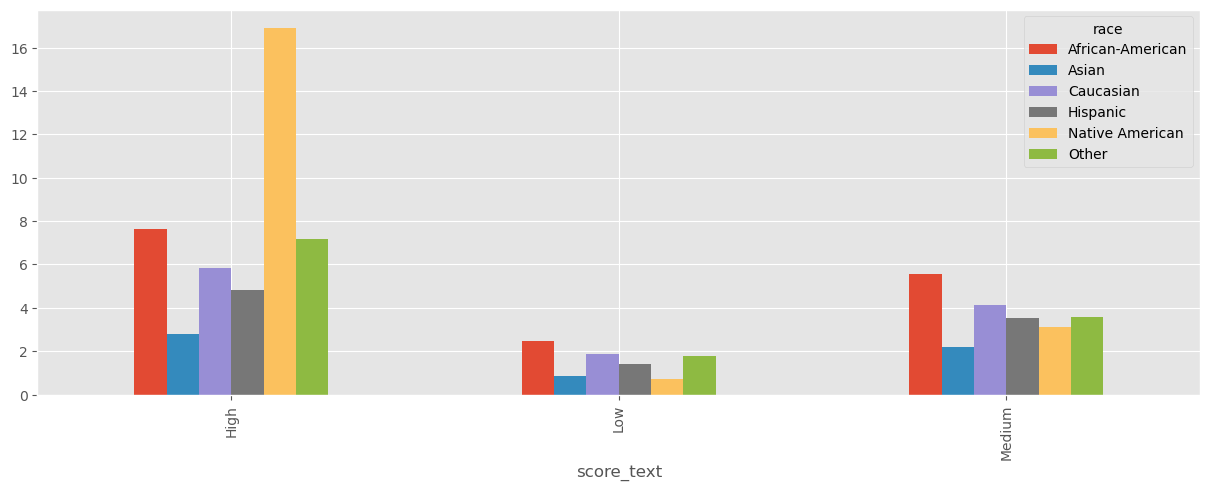

In [14]:
crime_df[crime_df.sex == "Male"].groupby(['score_text','race'])['priors_count'].mean().unstack().plot(kind='bar')


### To Do: Was there anything that surprised you from this graph?

In [ ]:
#No

Now let us explore how age and sex attributes look like in our dataset

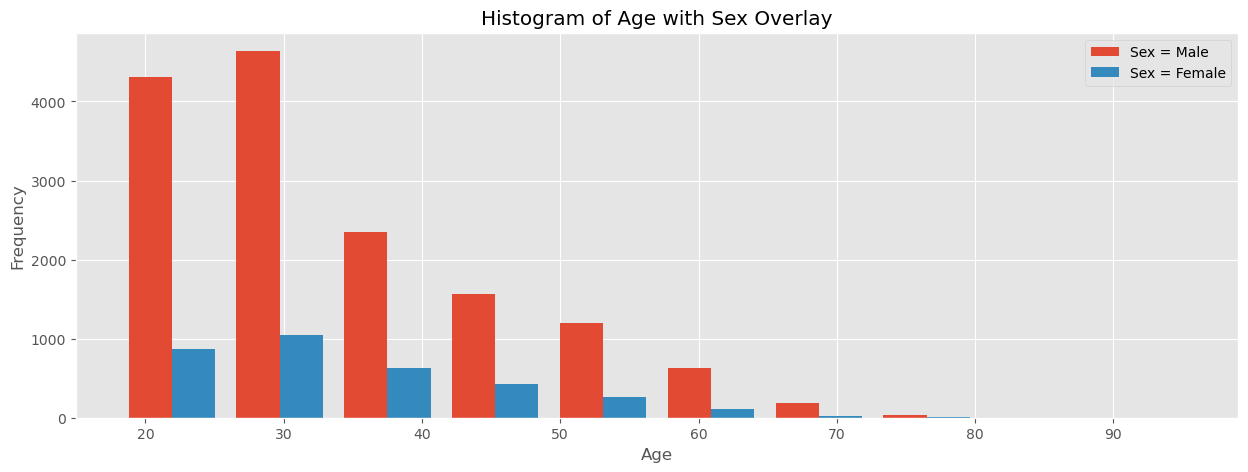

In [15]:
age_m = crime_df[crime_df.sex == "Male"]['age']
age_w = crime_df[crime_df.sex == "Female"]['age']

plt.hist([age_m, age_w], stacked = False) # the attribute stacked = False will display the two variables (age_m, age_w) side by side
plt.legend(['Sex = Male', 'Sex = Female']) # specify the values of the legend
plt.title('Histogram of Age with Sex Overlay') # specify the values of the title
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()  # specify the values of the x‐axis label, and y‐axis label and display the figure.


Next we want to create a normalized histogram of age with sex overlay
create a stacked histogram and save the information generated by the histogram.

[None, None, None, None, None, None, None, None, None, None]

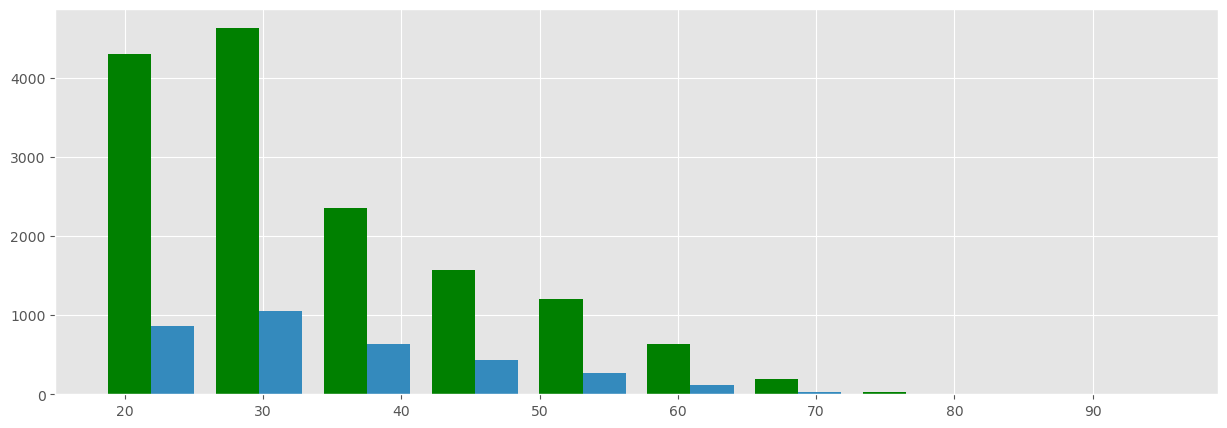

In [16]:
(n, bins, patches) = plt.hist([age_m, age_w], bins = 10, stacked = False)
# n is the height of the histogram bars and bins are the boundaries of each bin in the histogram
# patches is the individual patches used to create the histogram, e.g a collection of rectangles
plt.setp(patches[0], 'facecolor', 'green') # set the color property for one of the rectangles

In [17]:
n_table = np.column_stack((n[0], n[1])) # combine the heights of the two variables’ bars into one array using the column_stack() command
n_norm = n_table / n_table.sum(axis=1)[:, None] #  calculate what proportion of the bar is accounted for by each variable by dividing each row by the sum across that row
ourbins = np.column_stack((bins[0:10], bins[1:11])) #create an array whose rows are the exact cuts of each bin
# Each row in ourbins gives the upper and lower bounds of each bin

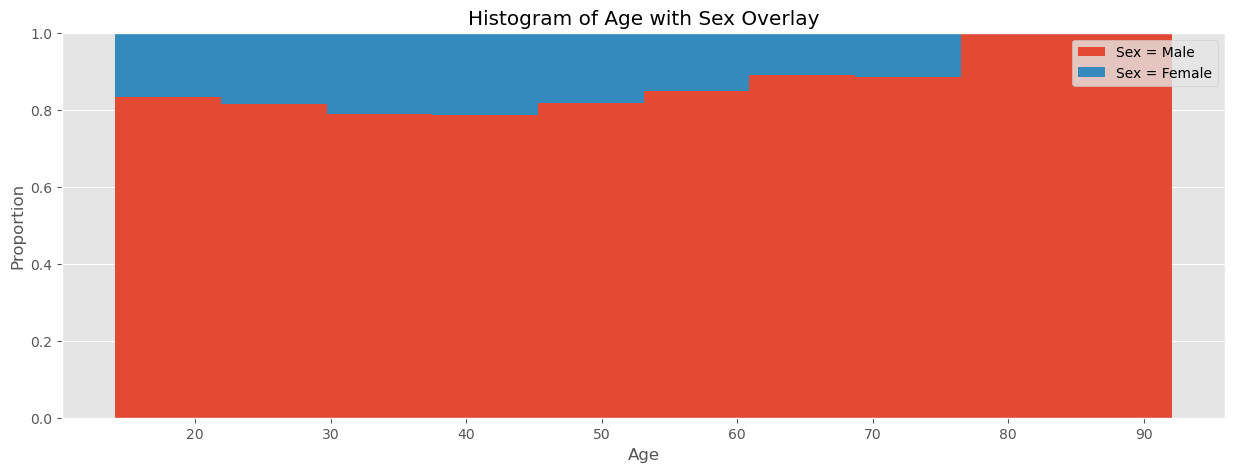

In [18]:
# using the bar() function the x attribute specifies the upper and lower bounds of the bins 
# the height attribute uses the normalized count values we created previously to specify the height of each of the two sections of each bar 
# and the width input reuses the bar widths from the original bar chart
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0],
width = ourbins[:, 1] - ourbins[:, 0])

# setting the bottom attribute to n_norm[:,0]specifies the second of the two bar sections to start on top of the first. 
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1],
width = ourbins[:, 1] - ourbins[:, 0],
bottom = n_norm[:,0])
# set the legend, title, xlabel, ylabel and show the figure
plt.legend(['Sex = Male', 'Sex = Female'])
plt.title('Histogram of Age with Sex Overlay')
plt.xlabel('Age'); plt.ylabel('Proportion'); plt.show()

### To Do: Create a normalized histogram with the sex and number of prior convictions (priors_count).

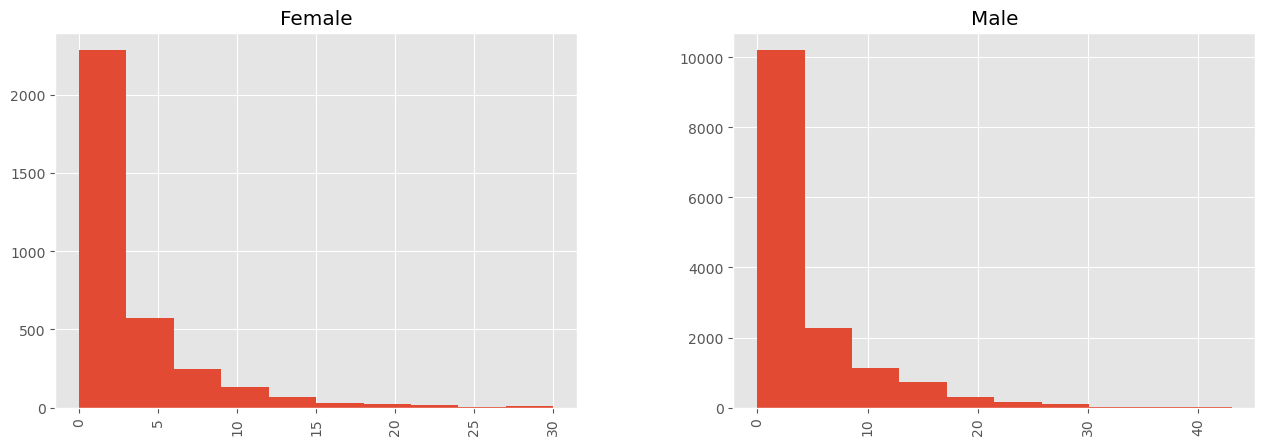

In [19]:
#normalized histogram with thr sex and number of prior convictions
hist = crime_df.hist(column='priors_count', by='sex', bins = 10)

## Correlations 

Correlation is a way to determine if two variables in a dataset are related in any way. Correlations have many real-world applications. We can see if using certain search terms are correlated to views on youtube. Or, we can see if ads are correlated to sales. When building machine learning models correlations are an important factor in determining features. Not only can this help us to see which features are linear related, but if features are strongly correlated we can remove them to prevent duplicating information.

Before we try and calculate correlations between attributes in our dataset we should get a sense of the data types of the attributes we have

Note: Transposing a DataFrame with mixed dtypes will result in a homogeneous DataFrame with the object dtype. If Transpose was used in an earlier step we can use the nfer_objects function where Pandas attempts infers better dtypes for object columns.
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.infer_objects.html for more details.

In [20]:
# crime_df = crime_df.infer_objects() # uncomment if the next statement results in [dtype('O')]
list(set(crime_df.dtypes.tolist())) # should see [dtype('O'), dtype('int64'), dtype('float64')]

[dtype('O'), dtype('float64'), dtype('int64')]

We can see here that we have integers, floats and objects.
With this information we can perform further analysis by selecting the columns that have number type data

In [21]:
df_num = crime_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,event
0,69,0,1,0,0,0,-1.0,1.0,0,NaN,0,1,1,0,0
1,69,0,1,0,0,0,-1.0,1.0,0,NaN,0,1,1,0,0
2,31,0,5,0,0,0,NaN,NaN,-1,NaN,0,5,2,0,0
3,34,0,3,0,0,0,-1.0,1.0,1,NaN,1,3,1,0,1
4,24,0,4,0,1,4,-1.0,1.0,1,0.0,0,4,3,4,0


Plotting a histogram of these columns can give us a sense of their distributions 

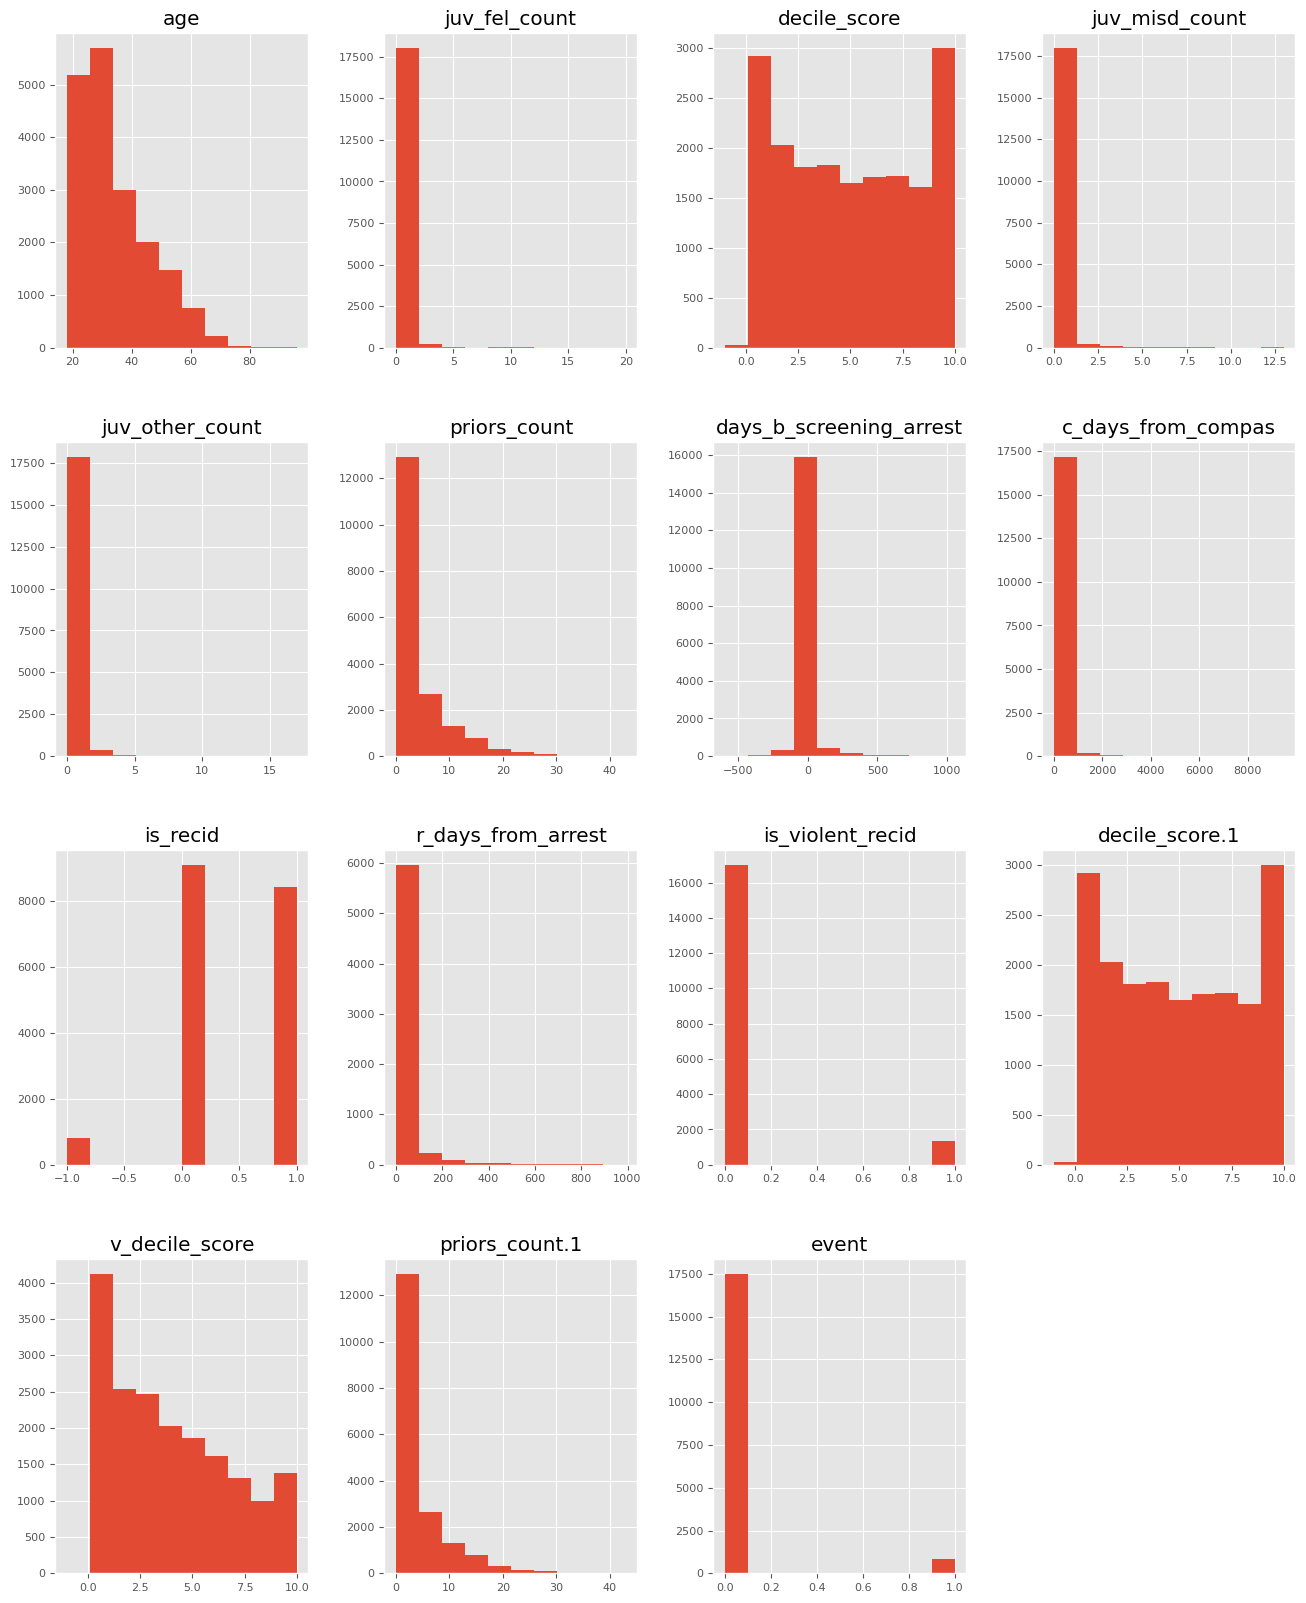

In [22]:
df_num.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8); 


In [23]:
df_num_corr = df_num.corr()['priors_count']
golden_features_list = df_num_corr.sort_values(ascending=False)
print("We calcuated {} values with the count of prior convictions:\n{}".format(len(golden_features_list), golden_features_list))

We calcuated 15 values with the count of prior convictions:
priors_count               1.000000
priors_count.1             1.000000
decile_score               0.412646
decile_score.1             0.412646
is_recid                   0.286582
juv_misd_count             0.224766
v_decile_score             0.190967
age                        0.176696
juv_fel_count              0.170535
juv_other_count            0.097978
is_violent_recid           0.068673
event                      0.032803
c_days_from_compas         0.005221
days_b_screening_arrest    0.002094
r_days_from_arrest        -0.038402
Name: priors_count, dtype: float64


### To Do: Calculate the correlations between the other numerical attributes and determine if any attributes can be considered redundant.

In [24]:
#calculate the correlation matrix
df_num_corr = df_num.corr()
golden_features_list = df_num_corr['priors_count'].sort_values(ascending=False)
print("We calcuated {} values with the count of prior convictions:\n{}".format(len(golden_features_list), golden_features_list))

We calcuated 15 values with the count of prior convictions:
priors_count               1.000000
priors_count.1             1.000000
decile_score               0.412646
decile_score.1             0.412646
is_recid                   0.286582
juv_misd_count             0.224766
v_decile_score             0.190967
age                        0.176696
juv_fel_count              0.170535
juv_other_count            0.097978
is_violent_recid           0.068673
event                      0.032803
c_days_from_compas         0.005221
days_b_screening_arrest    0.002094
r_days_from_arrest        -0.038402
Name: priors_count, dtype: float64
